In [126]:
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os   
import statsmodels.api as sm
from pandas import read_excel, DataFrame, merge, melt,concat,get_dummies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from helper import my_logit,scailing,is_categorical,my_ols, independence_test, normality_test

In [127]:
df =read_excel("./한국복지패널_17차.xlsx")

In [128]:
colname = df.iloc[1]
df.columns = colname
df= df.drop(1)
df.reset_index(drop=True, inplace=True)

In [129]:
df

1,h17_pid,h17_id,h17_reg7,h17_din,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_5,new_h1701_6,new_h1703_4,...,wc17_30,wc17_39,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
0,id,id,category,numeric,category,category,category,numeric,category,category,...,category,category,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
1,201,2,1,405,1,10,2,1945,4,9,...,0,0,0,5,63,15,3,8,80,15
2,301,3,1,2788,1,10,1,1948,3,2,...,0,0,0,2,23,2,46,2,65,24
3,401,4,1,2304,1,10,1,1942,7,3,...,0,0,0,5,17,5,18,16,43,21
4,601,6,1,5231,1,10,1,1962,6,1,...,2,2,0,13,24,13,53,11,118,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,1200701,12007,5,4963,1,10,1,1981,6,1,...,0,0,2,11,11,4,25,13,113,17
7862,1200801,12008,5,9182,1,10,1,1977,7,1,...,0,0,0,6,32,35,61,17,152,19
7863,1200901,12009,5,8548,1,10,1,1976,7,5,...,0,0,2,21,50,2,36,16,131,18
7864,1201001,12010,2,8452,1,10,1,1975,7,1,...,0,0,1,13,5,5,20,10,130,16


In [130]:
numeric_columns = [col for col in df.columns if df.iloc[0][col] == 'numeric']
numeric_data = {col: df[col] for col in numeric_columns}
numeric_df = pd.DataFrame(numeric_data)
numeric_df = numeric_df.drop(0)

In [131]:
numeric_df

,h17_din,new_h1701_5,h1706_6,h1707_3aq9,h1707_3aq10,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


In [132]:
numeric_df1 =numeric_df.rename(columns= 
{'h17_din':'disposable_income',
'new_h1701_5':"age",
"h1706_6":"house_price",
"h1707_3aq9":"pub_edu",
"h1707_3aq10":"priv_edu",
"new_h1703_5":"num_of_child",
"h1707_3aq2_2": "meal_out",
"h1707_3aq5_1": "utility_bills",
"h1707_3aq7": "apparel",
"h1707_3aq8": "insurance",
"h1707_3aq11":"entertainment",
"h1707_5aq3":"transportation",
"h1707_5aq4":"phone"})
numeric_df1[numeric_df1.columns] = numeric_df1[numeric_df1.columns].astype('int')
numeric_df1

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


#### 나이 컬럼 출생년도에서 2022년 기준 나이로 변환

In [133]:
numeric_df1['age'] = pd.Series([2022] * (len(numeric_df)-1)) - numeric_df1['age']

In [134]:
(numeric_df1==0).sum()

disposable_income       0
age                     0
house_price          1081
pub_edu              7002
priv_edu             6807
num_of_child         6409
apparel              5846
insurance            5627
entertainment        5816
transportation       5650
phone                5552
meal_out             5536
utility_bills        5537
dtype: int64

#### 0~17세 이하의 자녀가 있는 경우만을 고려

In [135]:
edf = numeric_df1[(numeric_df1['num_of_child'] != 0)]

In [136]:
for col in edf.columns:
    outlier =np.percentile(edf[col], 75) - np.percentile(edf[col],25)
    mean = edf[col].mean()
    std = edf[col].std()
    
    for index, value in enumerate(edf[col]):
        z_score = (value - mean) / std
        if abs(z_score) > outlier:
            edf.loc[index, col] = None  # Replace outlier with NaN

print(edf)

      disposable_income   age  house_price  pub_edu  priv_edu  num_of_child  \
9                5958.0  44.0      21000.0     88.0      67.0           1.0   
15               1969.0  61.0      25000.0      0.0       0.0           1.0   
16               3406.0  38.0     100000.0      0.0       0.0           1.0   
19               7586.0  50.0      17000.0      3.0      10.0           2.0   
25               4494.0  46.0       2500.0      0.0      42.0           2.0   
...                 ...   ...          ...      ...       ...           ...   
1372                NaN   NaN          NaN      NaN       NaN           NaN   
1403                NaN   NaN          NaN      NaN       NaN           NaN   
1421                NaN   NaN          NaN      NaN       NaN           NaN   
1424                NaN   NaN          NaN      NaN       NaN           NaN   
1428                NaN   NaN          NaN      NaN       NaN           NaN   

      apparel  insurance  entertainment  transporta

C:\Users\yis82\AppData\Local\Temp\ipykernel_27664\4073754640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.loc[index, col] = None  # Replace outlier with NaN


In [137]:
edf.dropna(axis=0,inplace  = True)

In [138]:
(edf == 0).sum()

disposable_income       0
age                     0
house_price           106
pub_edu              1038
priv_edu              608
num_of_child            0
apparel              1183
insurance            1185
entertainment        1194
transportation       1183
phone                1180
meal_out             1180
utility_bills        1180
dtype: int64

#### 결측치 제거

In [139]:
edf = edf[~(edf == 0).any(axis=1)]
edf

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
9,5958.0,44.0,21000.0,88.0,67.0,1.0,17.0,34.0,20.0,51.0,25.0,120.0,33.0
19,7586.0,50.0,17000.0,3.0,10.0,2.0,45.0,20.0,27.0,26.0,19.0,118.0,18.0
31,9504.0,49.0,70000.0,19.0,325.0,1.0,28.0,37.0,43.0,50.0,15.0,135.0,11.0
56,4987.0,51.0,570.0,42.0,9.0,1.0,2.0,31.0,14.0,31.0,18.0,111.0,18.0
75,5787.0,53.0,10000.0,5.0,132.0,2.0,9.0,8.0,33.0,45.0,21.0,180.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,10937.0,51.0,60000.0,5.0,220.0,1.0,22.0,58.0,16.0,82.0,37.0,136.0,17.0
7840,9566.0,45.0,70000.0,2.0,180.0,2.0,25.0,7.0,17.0,51.0,12.0,104.0,14.0
7856,7742.0,38.0,10000.0,1.0,89.0,2.0,11.0,24.0,46.0,22.0,12.0,123.0,16.0
7860,12027.0,45.0,25000.0,3.0,73.0,1.0,30.0,57.0,8.0,354.0,26.0,135.0,13.0


In [140]:
categorical_columns = [col for col in df.columns if df.iloc[0][col] == 'category']
categorical_columns
categorical_data = {col: df[col] for col in categorical_columns}
category_df = pd.DataFrame(categorical_data)
category_df= category_df.drop(0)
category_df

,h17_reg7,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_6,new_h1703_4,h1706_1,p1703_6,p1703_7,p1703_8,p1703_9,p1703_12,wc17_8aq6,wc17_8aq8,wc17_8,wc17_29,wc17_30,wc17_39
1,1,1,10,2,4,9,2,1,3,3,2,1,0,0,0,0,0,0
2,1,1,10,1,3,2,2,4,4,4,4,4,0,0,0,0,0,0
3,1,1,10,1,7,3,1,2,5,2,4,4,0,0,0,0,0,0
4,1,1,10,1,6,1,2,3,4,5,4,4,4,4,2,2,2,2
5,2,1,10,2,3,4,5,2,3,2,3,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,5,1,10,1,6,1,5,4,4,4,4,4,0,0,0,0,0,0
7862,5,1,10,1,7,1,5,4,4,4,4,4,0,0,0,0,0,0
7863,5,1,10,1,7,5,5,4,4,4,4,4,0,0,0,0,0,0
7864,2,1,10,1,7,1,5,3,4,4,4,4,0,0,0,0,0,0


In [141]:
category_df[category_df.columns] = category_df[category_df.columns].astype('category')
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 1 to 7865
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   h17_reg7     7865 non-null   category
 1   new_h1701_2  7865 non-null   category
 2   new_h1701_3  7865 non-null   category
 3   new_h1701_4  7865 non-null   category
 4   new_h1701_6  7865 non-null   category
 5   new_h1703_4  7865 non-null   category
 6   h1706_1      7865 non-null   category
 7   p1703_6      7865 non-null   category
 8   p1703_7      7865 non-null   category
 9   p1703_8      7865 non-null   category
 10  p1703_9      7865 non-null   category
 11  p1703_12     7865 non-null   category
 12  wc17_8aq6    7865 non-null   category
 13  wc17_8aq8    7865 non-null   category
 14  wc17_8       7865 non-null   category
 15  wc17_29      7865 non-null   category
 16  wc17_30      7865 non-null   category
 17  wc17_39      7865 non-null   category
dtypes: category(18)
memory usage

#### 결측치 확인

In [142]:
(category_df==0).sum()

h17_reg7          0
new_h1701_2       0
new_h1701_3       0
new_h1701_4       0
new_h1701_6       0
new_h1703_4       0
h1706_1           0
p1703_6         310
p1703_7         310
p1703_8         310
p1703_9         310
p1703_12        310
wc17_8aq6      6330
wc17_8aq8      6330
wc17_8         6330
wc17_29        6330
wc17_30        6330
wc17_39        6330
dtype: int64

##### wc 카테고리들은 결측치가 데이터의 20%보다 많기 떄문에 변수로서 의미가 없다고 판단하여 삭제한다.
##### 또한 결측치 행들도 삭제

In [143]:
category_df = category_df.drop(["wc17_8aq6","wc17_8aq8","wc17_8", "wc17_29","wc17_30","wc17_39"],axis=1)
category_df = category_df[~(category_df == 0).any(axis=1)]


(category_df==0).sum()

h17_reg7       0
new_h1701_2    0
new_h1701_3    0
new_h1701_4    0
new_h1701_6    0
new_h1703_4    0
h1706_1        0
p1703_6        0
p1703_7        0
p1703_8        0
p1703_9        0
p1703_12       0
dtype: int64

#### 범주형 변수 단순화 작업

#### 7개 권역별 지역구분

- 기존 분류 기준 
    1. 서울          2. 수도권(인천/경기)    3. 부산/경남/울산   4.대구/경북   
    5. 대전/충남/세종   6. 강원/충북               7.광주/전남/전북/제주도\

- 재분류 기준

    1, 2 >>> 1(수도권)
    
    3,4,5,6,7 >>>> 2(비수도권) 

In [144]:
district = DataFrame(category_df['h17_reg7'])
district = district.reset_index(drop=True)
district['h17_reg7'] = district['h17_reg7'].cat.set_categories(district['h17_reg7'].cat.categories)
district['h17_reg7'] = district['h17_reg7'].replace([1,2], 1)
district['h17_reg7'] = district['h17_reg7'].replace([3,4,5,6,7], 2)
district.rename(columns={'h17_reg7':'area'},inplace=True)
district

,area
0,1
1,1
2,1
3,1
4,1
...,...
7550,2
7551,2
7552,2
7553,1


#### 주택 유형

기존 주택 유형
|주택 유형|   |
|---|---|
1.일반단독주택       | 7.점포주택 등 복합용도 주택
2.다가구용 단독주택 |8.비거주용 건물 내 주택(상가,공장 등)
3.다세대주택        | 9.오피스텔
4.연립주택(빌라)   |10.비닐하우스, 움막, 판잣집
5.일반아파트        |11.임시가건물(컨테이너, 재개발지역 가이주단지 포함)
6.영구임대아파트   |12. 기타  
|13. 국민공공임대아파트"|
--------------------------------------------------------------------------

|재분류 후 주택 유형||
|---|---|
|1,2,3,4,9| 1. 일반 주택|
|5,7,8|2. 아파트|
|6,10,11,12|3. 복지 주택|

In [145]:
house_type = DataFrame(category_df['h1706_1'])
house_type = house_type.reset_index(drop=True)
house_type['h1706_1'] = house_type['h1706_1'].cat.set_categories(house_type['h1706_1'].cat.categories)
house_type['h1706_1'] = house_type['h1706_1'].replace([1,2,3,4,9], 1)
house_type['h1706_1'] = house_type['h1706_1'].replace([5,7,8], 2)
house_type['h1706_1'] = house_type['h1706_1'].replace([6,10,11,12,13], 3)
house_type.rename(columns={'h1706_1':'house_type'},inplace=True)
house_type

,house_type
0,1
1,1
2,1
3,1
4,2
...,...
7550,2
7551,2
7552,2
7553,2


경제활동 참여상태 재분류

- 1,5,6 비임금 종사자(1)
- 2,3,4 임시 근로자(2)
- 7,8,9 종신 근로자(3)


In [146]:
employee_type = DataFrame(category_df['new_h1703_4'])
employee_type = employee_type.reset_index(drop=True)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].cat.set_categories(employee_type['new_h1703_4'].cat.categories)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([1,5,6], 3)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([2,3,4], 2)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([7,8,9,], 1)
employee_type.rename(columns ={'new_h1703_4':'employee_type'},inplace=True)
employee_type

,employee_type
0,1
1,2
2,2
3,2
4,2
...,...
7550,2
7551,2
7552,2
7553,2


In [147]:
education_level = DataFrame(category_df['new_h1701_6'])
education_level = education_level.reset_index(drop=True)
education_level['new_h1701_6'] = education_level['new_h1701_6'].astype('category')
education_level['new_h1701_6'] = education_level['new_h1701_6'].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9])
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([1, 2, 3, 4, 5], 1)
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([6, 7, 8, 9], 2)
education_level.rename(columns={'new_h1701_6':'education_level'},inplace=True)
education_level

,education_level
0,1
1,1
2,2
3,2
4,1
...,...
7550,2
7551,2
7552,2
7553,2


[1,2] >> 불만족
3 >> 보통
[4,5] >> 만족

In [148]:
def variable_maker(nameOfcolumn,colname,myname):
    nameOfcolumn = DataFrame(category_df[colname])
    nameOfcolumn = nameOfcolumn.reset_index(drop=True)
    nameOfcolumn[colname] = nameOfcolumn[colname].cat.set_categories(nameOfcolumn[colname].cat.categories)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([1,2],1)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([3],2)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([4,5],3)
    nameOfcolumn.rename(columns={colname:myname},inplace = True)
    return nameOfcolumn

In [149]:
income_sat = variable_maker('income_sat','p1703_6','income_sat')
residential_sat= variable_maker('residential_sat',"p1703_7",'residential_sat')
family_sat = variable_maker('family_sat','p1703_8','family_sat')
job_sat = variable_maker('job_sat','p1703_9','job_sat')
general_sat = variable_maker('geneal_sat','p1703_12','general_sat')


In [150]:
new_cat_df = concat([house_type,employee_type,education_level,income_sat,residential_sat,family_sat,job_sat,general_sat],axis=1)
cat_df=get_dummies(new_cat_df,dtype=int)
cat_df = cat_df.drop(['income_sat_0',"residential_sat_0","family_sat_0","job_sat_0",'general_sat_0'],axis=1)

#### 연구 내용
 ##### 가설 1) 가구주의 유복한 성장 과정이 사교육비에 긍정적인 영향을 끼친다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |부모의 교육수준|교육수준 1~5=고졸이하(1) 6,7,8,9 대졸이상(2)|
 |직업 만족도|1 불만족, 2보통, 3만족|
 |주된 경제활동 참여상태| 1. 비임금 종사자, 2. 임시 근로자, 3. 종신 근로자|
 |부모의 연령 | 2022년 기준 나이|
 |가처분소득| 처분 가능한 소득|

#### 부모의 교육수준에 따른 사교육비 지출 확인

In [151]:
edu=concat([education_level,edf['priv_edu']],axis=1)
edu=edu.query('priv_edu>0')
edu.groupby('education_level').mean()

,priv_edu
education_level,
1,82.222222
2,72.454545


In [152]:
employee = concat([employee_type,edf['priv_edu']], axis=1)
employee = employee.query('priv_edu>0')
employee.groupby('employee_type').mean()

,priv_edu
employee_type,
2,87.375
1,70.875


In [153]:
job = concat([job_sat,edf['priv_edu']],axis=1)
job = job.query('priv_edu > 0')
job.groupby('job_sat').mean()

,priv_edu
job_sat,
0,NaN
1,60.875000
2,55.785714
3,94.970588


In [154]:
from scipy.stats import skew, kurtosis

가처분소득 데이터가 정규성을 따르지 않기 떄문에 log 변환을 하여 정규성을 따르는 데이터로 변환을 하였다.

In [155]:
log_edf = np.log(edf)

(array([ 5., 10., 12., 23.,  7.,  6.,  2.,  1.,  0.,  1.]),
 array([ 8.0783781 ,  8.32630629,  8.57423448,  8.82216267,  9.07009086,
         9.31801905,  9.56594724,  9.81387542, 10.06180361, 10.3097318 ,
        10.55765999]),
 <BarContainer object of 10 artists>)

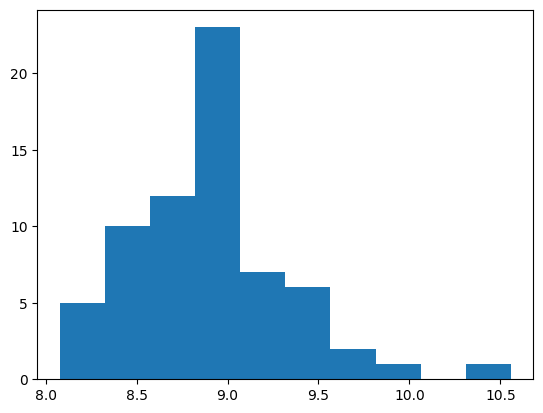

In [156]:
plt.hist(data=log_edf,x='disposable_income',bins=10)

In [157]:
sk = skew(log_edf['disposable_income'])
kr = kurtosis(log_edf['disposable_income'])
print(sk,kr)

0.9638109975736807 2.032814866771786


#### 사교육비 데이터 역시 정규성을 따르지 않기 때문에 log변환을 해주었다.

In [158]:
sk = skew(log_edf['priv_edu'])
kr = kurtosis(log_edf['priv_edu'])
print(sk,kr)

-0.8904720909214353 1.4495114276670735


두 데이터 모두왜도의 절대값이 3 미만이며, 첨도가 8미만이기 때문에 가처분소득 데이터가 정규성을 따른다고 판단할 수 있다.

In [159]:
cat_df1 = concat([employee_type,job_sat,education_level],axis=1)
cat_df1=get_dummies((cat_df1),dtype=int).drop('job_sat_0',axis=1)
cat_df1

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2
0,0,1,1,0,0,1,0
1,1,0,0,0,1,1,0
2,1,0,0,0,1,0,1
3,1,0,0,0,1,0,1
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
7550,1,0,0,0,1,0,1
7551,1,0,0,0,1,0,1
7552,1,0,0,0,1,0,1
7553,1,0,0,0,1,0,1


In [160]:
test_df1 = concat([cat_df1,log_edf['priv_edu'],log_edf['disposable_income']],axis=1)
test_df1 =test_df1.dropna()
test_df1.head()

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,priv_edu,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.204693,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.302585,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.783825,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.197225,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.882802,8.663369


In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
X_train, X_test, y_train, y_test = train_test_split(test_df1.drop('priv_edu',axis=1), test_df1['priv_edu'], test_size=0.2, random_state=42)
model = LinearRegression()
y_pred = model.fit(X_train,y_train).predict(xdf1)

In [163]:
model =ols('priv_edu~disposable_income+education_level_1+education_level_2+employee_type_1+employee_type_2+job_sat_1+job_sat_2+job_sat_3',data=test_df1)
fit = model.fit()
fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     4.290
Date:                Tue, 22 Aug 2023   Prob (F-statistic):            0.00252
Time:                        11:57:23   Log-Likelihood:                -62.706
No. Observations:                  56   AIC:                             137.4
Df Residuals:                      50   BIC:                             149.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2837      0.932     -2.451      0.018      -4.155      -0.412
disposable_income     1.0483      0.246      4.268      0.000       0.555       1.542
education_level_1    -1.0706      0.478     -2.240      0.030      -2.031      -0.111
education_level_2    -1.2131      0.493     -2.461      0.017      -2.203      -0.223
employee_type_1      -1.1114      0.477     -2.329      0.024      -2.070      -0.153
employee_type_2      -1.1723      0.483     -2.430      0.019      -2.141      -0.203
job_sat_1            -0.7686      0.377     -2.038      0.047      -1.526      -0.011
job_sat_2            -0.8987      0.341     -2.633      0.011      -1.584      -0.213
job_sat_3            -0.6165      0.359     -1.718      0.092      -1.337       0.104
==============================================================================
Omnibus:                        6.992   Durbin-Watson:                   2.426
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.246
Skew:                          -0.794   Prob(JB):                       0.0440
Kurtosis:                       3.392   Cond. No.                     1.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


$$
\log(\text{사교육비}) = -2.451 - 0.8075 \times \text{employee\_type\_1} - 0.8661 \times \text{employee\_type\_2}+0 \times \text{employee\_type\_3} \\
+ 1.1439 \times \text{education\_level\_1} - 1.3073 \times \text{education\_level\_2} - 0.8245 \times \text{job\_sat\_1} - 0.9513 \times \text{job\_sat\_2} - 0.6754 \times \text{job\_sat\_3} \\
+ 1.0444 \times \log(\text{가처분소득}) + \epsilon
$$

해석:
- $-2.451$: 모든 더미 변수가 0(직원 유형, 교육 수준, 직무 만족도에 상관없이)이고 로그 가처분소득이 0일 때의 예상 로그 사교육비입니다.
- $-0.8075$: 가구주가 비임금 종사자(employee_type_1)에 속할 때 로그 사교육비의 변화량을 나타냅니다.
- $-0.8661$: 가구주가 임시 근로자(employee_type_2)에 속할 때 로그 사교육비의 변화량을 나타냅니다.
- $0$: 가구주가 종신 근로자(employee_type_3)에 속할 때 로그 사교육비의 변화량을 나타냅니다.
- $-1.1439$: 가구주의 최종 학력이 고졸 이하(education_level_1)일 때 로그 사교육비의 변화량을 나타냅니다.
- $-1.3073$: 가구주의 최종 학력이 대졸 이상(education_level_2)일 때 로그 사교육비의 변화량을 나타냅니다.
- $-0.8245$: 직무 만족도가 불만족(job_sat_1)일 때 로그 사교육비의 변화량을 나타냅니다.
- $-0.9513$: 직무 만족도가 보통(job_sat_2)일 때 로그 사교육비의 변화량을 나타냅니다.
- $-0.6754$ : 직무 만족도가 만족(job_sat_3)일 때 로그 사교육비의 변화량을 나타냅니다.
- $1.0444$: 로그 가처분소득이 1 증가할 때 평균적으로 변화하는 로그 사교육비의 변화량을 나타냅니다.
- $\epsilon$: 오차를 나타냅니다.




F-statistics p-value가 유의수준인 0.05보다 작기 때문에 변수들이 사교육비의 변화량을 설명한다고 판단할 수 있다. 또한, 직업 만족도 만족 항목을 제외하고 전부 유의수준 0.05보다 작기 때문에 식이 유의하다고 주장할 수 있다.

In [164]:
xdf1 = test_df1.drop('priv_edu',axis=1)
xdf1

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,8.663369
82,0.0,1.0,1.0,0.0,0.0,1.0,0.0,8.828641
99,1.0,0.0,0.0,0.0,1.0,0.0,1.0,10.557660
103,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.038959
107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.024854
108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.893573


In [165]:
test_df1

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,priv_edu,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.204693,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.302585,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.783825,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.197225,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.882802,8.663369
82,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.499810,8.828641
99,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.709530,10.557660
103,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.158883,9.038959
107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.433987,9.024854
108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.488636,8.893573


In [166]:
rdf = DataFrame({'log_dis_income':test_df1['disposable_income'],'log_priv_edu' :test_df1['priv_edu'],'fitted_values': y_pred})
rdf

,log_dis_income,log_priv_edu,fitted_values
9,8.692490,4.204693,3.762241
19,8.934060,2.302585,3.944445
31,9.159468,5.783825,4.461966
56,8.514590,2.197225,3.491880
75,8.663369,4.882802,4.209582
82,8.828641,4.499810,3.910855
99,10.557660,4.709530,5.380373
103,9.038959,4.158883,4.234892
107,9.024854,3.433987,4.360433
108,8.893573,4.488636,3.913908


#### 실제 값과 예상 결과를 재배치

In [167]:
mdf = melt(rdf, id_vars=['log_dis_income'], value_vars=['log_priv_edu', 'fitted_values'])
mdf

,log_dis_income,variable,value
0,8.692490,log_priv_edu,4.204693
1,8.934060,log_priv_edu,2.302585
2,9.159468,log_priv_edu,5.783825
3,8.514590,log_priv_edu,2.197225
4,8.663369,log_priv_edu,4.882802
...,...,...,...
107,8.547722,fitted_values,3.864377
108,8.262301,fitted_values,3.437771
109,8.430763,fitted_values,3.610756
110,8.078378,fitted_values,3.768352


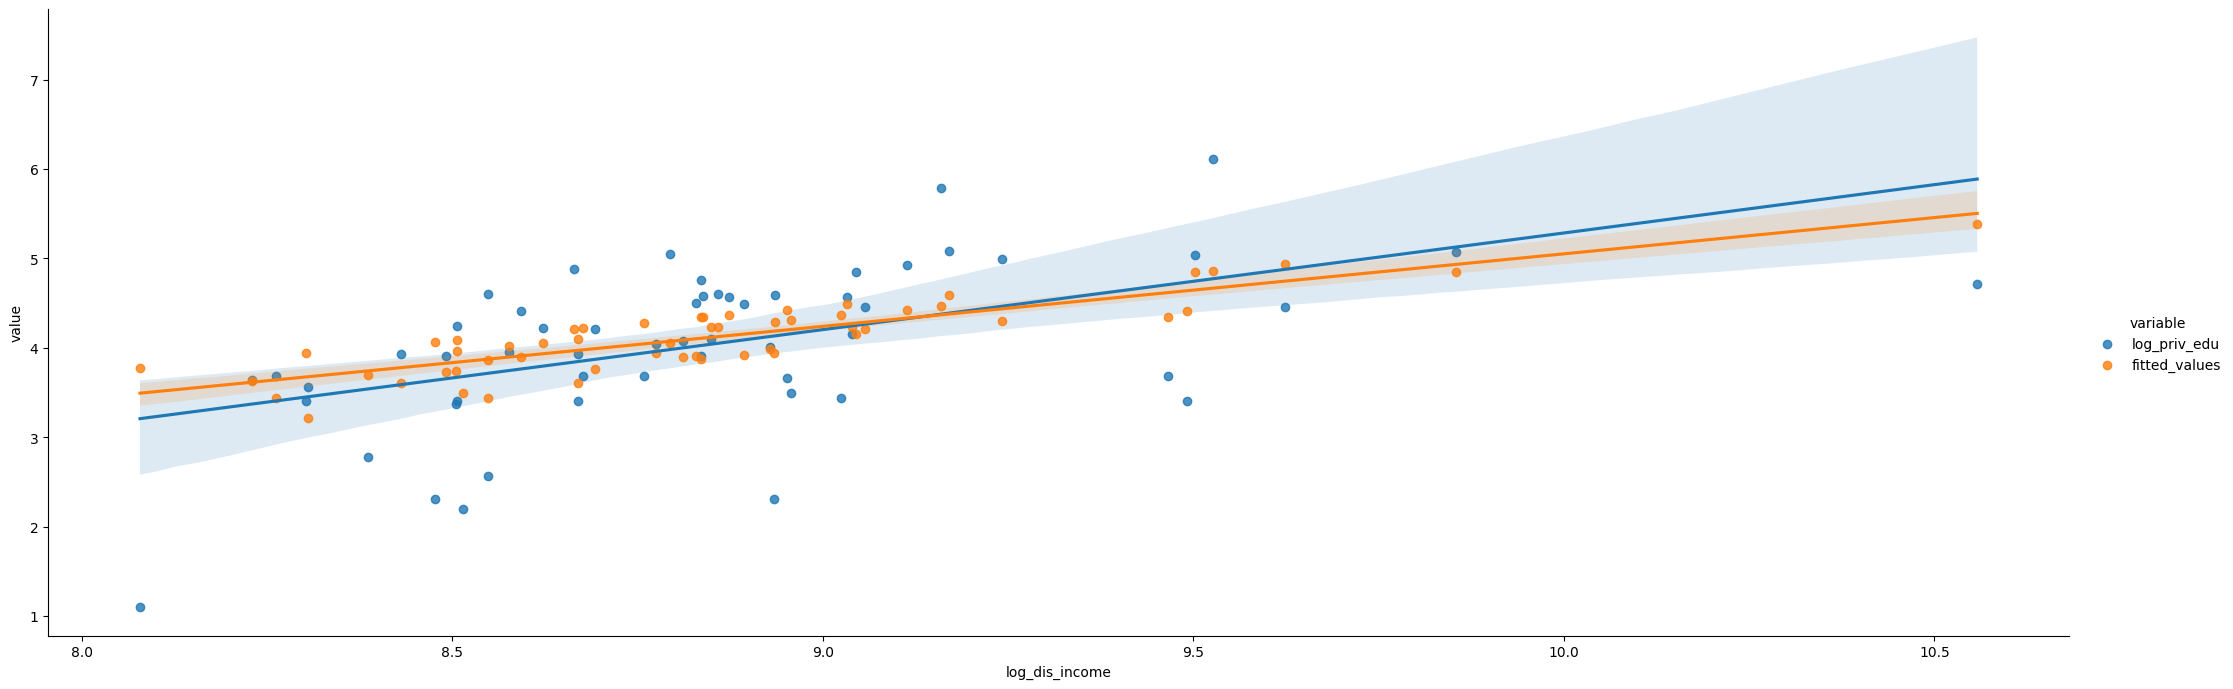

In [168]:
sb.lmplot(data=mdf, x="log_dis_income", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()

##### 가설 2) 부유한 가정 환경이(긍정적 경제 상태) 사교육비 지출과 양의 상관관계를 갖는다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |7개 권여별 지역 구분|1. 수도권 2. 비수도권|
 |주택 유형|1.일반 주택 2. 아파트 3. 복지 주거시설|
 |집 값| 집의 가격(만원)|
 |생활 만족도((나)가족의 수입 만족도, (다)주거 환경 만족도,(아)전반적 만족도)| 1. 불만족, 2.보통, 3. 만족||
 |가처분 소득| 단위 (만원)|

In [169]:
a=concat([district,edf['priv_edu']],axis=1)
a=a.query('priv_edu>0')
a.groupby('area').mean()

,priv_edu
area,
1,91.428571
2,73.628571


In [170]:
xdf = concat([log_edf['priv_edu'],district, house_type,log_edf['house_price'],log_edf['disposable_income'],residential_sat,family_sat,general_sat],axis=1)

In [189]:
final_df = concat([edf, cat_df],axis = 1).dropna()
final_df

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,...,residential_sat_3,family_sat_1,family_sat_2,family_sat_3,job_sat_1,job_sat_2,job_sat_3,general_sat_1,general_sat_2,general_sat_3
9,5958.0,44.0,21000.0,88.0,67.0,1.0,17.0,34.0,20.0,51.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
19,7586.0,50.0,17000.0,3.0,10.0,2.0,45.0,20.0,27.0,26.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31,9504.0,49.0,70000.0,19.0,325.0,1.0,28.0,37.0,43.0,50.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
56,4987.0,51.0,570.0,42.0,9.0,1.0,2.0,31.0,14.0,31.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
75,5787.0,53.0,10000.0,5.0,132.0,2.0,9.0,8.0,33.0,45.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
82,6827.0,44.0,90000.0,5.0,90.0,2.0,31.0,19.0,17.0,27.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99,38471.0,49.0,47000.0,5.0,111.0,1.0,25.0,74.0,13.0,28.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
103,8425.0,46.0,8000.0,1.0,64.0,1.0,24.0,109.0,31.0,65.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
107,8307.0,45.0,7000.0,3.0,31.0,3.0,23.0,12.0,5.0,91.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
108,7285.0,43.0,65000.0,6.0,89.0,2.0,25.0,24.0,24.0,239.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## 다중 회귀 분석

In [172]:
model = my_ols(xdf, 'priv_edu',['area','house_type','house_price','residential_sat','family_sat','general_sat','disposable_income'])
model.summary

['priv_edu', 'area', 'house_type', 'house_price', 'disposable_income', 'residential_sat', 'family_sat', 'general_sat']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     3.743
Date:                Tue, 22 Aug 2023   Prob (F-statistic):            0.00104
Time:                        11:57:24   Log-Likelihood:                -55.755
No. Observations:                  56   AIC:                             133.5
Df Residuals:                      45   BIC:                             155.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8367      0.991     -2.861      0.006      -4.834      -0.840
area[T.2]               -0.1564      0.208     -0.750      0.457      -0.576       0.263
house_type[T.2]         -0.0815      0.212     -0.385      0.702      -0.508       0.345
house_type[T.3]         -0.1414      0.500     -0.283      0.779      -1.148       0.866
residential_sat[T.1]    -0.7924      0.462     -1.714      0.093      -1.723       0.139
residential_sat[T.2]    -1.1330      0.429     -2.640      0.011      -1.997      -0.269
residential_sat[T.3]    -0.9113      0.367     -2.484      0.017      -1.650      -0.173
family_sat[T.1]         -1.2486      0.596     -2.094      0.042      -2.449      -0.048
family_sat[T.2]         -1.1580      0.464     -2.496      0.016      -2.092      -0.224
family_sat[T.3]         -0.4300      0.433     -0.993      0.326      -1.303       0.442
general_sat[T.1]      1.038e-16   1.68e-16      0.618      0.540   -2.34e-16    4.42e-16
general_sat[T.2]        -1.3638      0.488     -2.793      0.008      -2.347      -0.380
general_sat[T.3]        -1.4729      0.539     -2.733      0.009      -2.558      -0.387
house_price              0.2272      0.101      2.250      0.029       0.024       0.431
disposable_income        0.8678      0.279      3.111      0.003       0.306       1.430
==============================================================================
Omnibus:                       10.280   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.938
Skew:                          -0.924   Prob(JB):                      0.00695
Kurtosis:                       3.919   Cond. No.                     1.12e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.17e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

RFE 방식

In [173]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = xdf.drop('priv_edu',axis=1)
y = xdf['priv_edu']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize RFE with the model and select features to achieve the highest R-squared
best_r2 = -float('inf')
best_selected_indices = None

for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_indices = np.where(rfe.support_)[0]
    # Predict on the validation set and calculate R-squared
    y_pred = model.fit(X_train.iloc[:, selected_indices], y_train).predict(X_test.iloc[:, selected_indices])
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_selected_indices = selected_indices

# Print the best selected feature indices and their count
print("Best Selected Feature Indices:", best_selected_indices)
print("Number of Selected Features:", len(best_selected_indices))
print("Best R-squared:", best_r2)

Best Selected Feature Indices: [3 5]
Number of Selected Features: 2
Best R-squared: 0.3064584789110031


#### 주성분 분석 이용

In [177]:
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 


In [190]:
X= xdf.drop('priv_edu',axis=1)
y= xdf['priv_edu']

In [191]:
model = pca(n_components=len(xdf.columns))
fit = model.fit_transform(X)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 6
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':          area  house_type  house_price  disposable_income  residential_sat  \
 PC1  0.061550    0.076323    -0.975892          -0.162231         0.081958   
 PC2 -0.123707    0.055385    -0.102667          -0.056538        -0.700957   
 PC3 -0.159943    0.922576     0.029120           0.248951         0.181910   
 PC4  0.972678    0.124236     0.037123           0.124606        -0.063968   
 PC5  0.051959    0.023699     0.126576          -0.682184         0.517378   
 PC6 -0.080764   -0.341294    -0.114795           0.527553         0.335163   
 
      family_sat  general_sat  
 PC1    0.041460     0.057149  
 PC2   -0.455704    -0.518541  
 PC3   -0.165367     0.003211  
 PC4   -0.124756    -0.043607  
 PC5   -0.360274    -0.343314  
 PC6   -0.681446     0.093821  ,
 'PC':            PC1       PC2       PC3       PC4       PC5       PC6
 9    -0.162337  0.787747 -0.724147 -0.661569 -0.140952 -0.219819
 19    0.143796 -0.423715 -0.485041 -0.746886 -0.158430  0.360863
 31 

In [180]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,house_price,9.992321e-01,best
1,PC2,disposable_income,9.992273e-01,best
2,PC3,transportation,9.989544e-01,best
3,PC4,meal_out,-9.117433e-01,best
4,PC5,insurance,8.868792e-01,best
5,PC6,pub_edu,9.125276e-01,best
6,PC7,entertainment,9.407319e-01,best
7,PC8,apparel,7.176110e-01,best
8,PC9,apparel,-6.547694e-01,best
9,PC10,utility_bills,7.575024e-01,best


In [192]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['entertainment',
 'meal_out',
 'num_of_child',
 'transportation',
 'residential_sat_1',
 'income_sat_2',
 'residential_sat_2',
 'income_sat_3',
 'disposable_income',
 'age',
 'employee_type_2',
 'apparel',
 'job_sat_2',
 'education_level_1',
 'employee_type_1',
 'utility_bills',
 'insurance',
 'house_type_2',
 'family_sat_1',
 'house_price',
 'pub_edu',
 'house_type_3',
 'job_sat_3',
 'job_sat_1',
 'general_sat_2']

In [194]:
ols = my_ols(final_df, 'priv_edu', feature)
ols.summary

PatsyError: Error evaluating factor: NameError: name 'house_type_2' is not defined
    priv_edu~entertainment+meal_out+num_of_child+transportation+residential_sat_1+income_sat_2+residential_sat_2+income_sat_3+disposable_income+age+employee_type_2+apparel+job_sat_2+education_level_1+employee_type_1+utility_bills+insurance+house_type_2+family_sat_1+house_price+pub_edu+house_type_3+job_sat_3+job_sat_1+general_sat_2
                                                                                                                                                                                                                                                ^^^^^^^^^^^^

log(사교육비)=−24.2460+0.3066×entertainment+0.2796×utility_bills−41.5648×house_type_2
−36.2127×education_level_1−108.1019×family_sat_1−12.6553×residential_sat_1
+19.2420×general_sat_2−18.1044×house_type_3+1.0058×meal_out
−0.8197×employee_type_1+49.3867×residential_sat_2−23.4262×employee_type_2
+29.2180×job_sat_3−0.2990×insurance−29.1117×income_sat_2
−11.5754×num_of_child+0.8833×apparel−0.1804×transportation
−0.0002×disposable_income+0.4714×age+0.0009×house_price
−7.8183×income_sat_3−17.5863×job_sat_1−0.3443×pub_edu
−35.8776×job_sat_2+ϵ
해석:

각 계수는 해당 변수가 변할 때 로그 사교육비에 미치는 변화량을 나타냅니다.
계수의 부호와 절대값의 크기는 해당 변수의 영향력과 통계적 유의성을 의미합니다.
예를 들어, entertainment 변수가 1 증가하면 로그 사교육비는 약 0.3066 증가합니다.
각 변수의 p-value는 해당 변수가 통계적으로 유의미한지를 나타냅니다. (일반적으로 0.05 이하면 유의미)
Adjusted R-squared는 모델이 데이터를 얼마나 잘 설명하는지를 나타내며, 값이 0.370인 것으로 보입니다.
F-statistic와 해당 p-value는 모델 전체의 유의미성을 검정합니다. (일반적으로 0.05 이하면 유의미)
계수와 통계적 지표를 통해 각 변수의 영향력을 이해할 수 있습니다.

In [184]:
X= final_df.drop('priv_edu',axis=1)
y= final_df['priv_edu']


In [185]:
y_pred = ols.fit.predict(X)
len(y_pred)


56

ValueError: x and y must be the same size

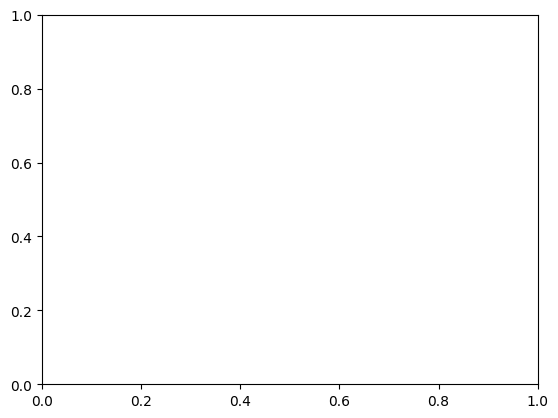

In [186]:
plt.scatter(edf['priv_edu'],y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')  # Diagonal line for reference
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Sample data - Replace this with your dataset
# X should be a pandas DataFrame containing the features, and y should be a pandas Series containing the target variable.
# For example:
# X = pd.DataFrame(data, columns=['feature1', 'feature2', ...])
# y = pd.Series(target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV model to perform L1 regularization and automatically select the best alpha (regularization strength)
lasso_model = LassoCV(cv=5)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
best_alpha = lasso_model.alpha_

# Get the coefficients of the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print the results
print("Best alpha (regularization strength):", best_alpha)
print("Selected features:", selected_features)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test set:", mse)

Best alpha (regularization strength): 853.8583973809467
Selected features: Index(['disposable_income', 'house_price'], dtype='object')
Mean Squared Error (MSE) on test set: 2572.7841420546183
